In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import date
from sklearn.decomposition import PCA
import os
import sys
import util

In [18]:
import importlib
importlib.reload(util)

<module 'util' from '/Users/mazighlahiani/Desktop/portofolio_construction/binance/code_base/binance-public-data/python/util.py'>

In [19]:
all_df, all_open, train, test = util.load_train_dataset()

Symbols :  ['YOYOBNB', 'SUBETH', 'WABIETH', 'KMDETH', 'ELFETH', 'XMRETH', 'LSKBTC', 'VENBNB', 'MCOBTC', 'ARNBTC', 'STORJBTC', 'TNTBTC', 'VENETH', 'OSTBTC', 'WABIBNB', 'YOYOETH', 'ETCBTC', 'NULSBNB', 'BATBTC', 'CMTETH', 'LENDBTC', 'NEOBNB', 'DASHBTC', 'NEOETH', 'BTCUSDT', 'XRPETH', 'CDTBTC', 'ASTETH', 'CMTBNB', 'NULSETH', 'ARKBTC', '.DS_Store', 'IOTABNB', 'MTLETH', 'AIONETH', 'IOTAETH', 'FUELBTC', 'ENGETH', 'SNGLSBTC', 'KNCBTC', 'POEBTC', 'BCPTETH', 'DGDETH', 'MANAETH', 'ICXBNB', 'EVXETH', 'BTSETH', 'SALTBTC', 'BTSBNB', 'MTHETH', 'BNTETH', 'QTUMETH', 'XLMBTC', 'ICXETH', 'BCPTBNB', 'ZRXETH', 'GASBTC', 'GTOBTC', 'FUNBTC', 'MODETH', 'AMBBTC', 'XVGETH', 'TRXBTC', 'POWRBNB', 'LRCETH', 'CNDBTC', 'TNBBTC', 'ADXBTC', 'RDNBTC', 'ENJBTC', 'PPTBTC', 'SNMBTC', 'BCDETH', 'POWRETH', 'BCCBTC', 'BNBETH', 'LINKBTC', 'ZECBTC', 'XZCBTC', 'SNTBTC', 'ICNETH', 'EOSBTC', 'GXSETH', 'WAVESBNB', 'HSRETH', 'WAVESETH', 'DNTETH', 'QSPBTC', 'REQETH', 'WTCBTC', 'ADABTC', 'LTCETH', 'OAXETH', 'BTGBTC', 'BQXETH', 'DLTET

/Users/mazighlahiani/Desktop/portofolio_construction/binance/code_base/binance-public-data/python/util.py:51: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  if(last_date_symbol > last_date):


ADAETH 2023-06-30 23:00:00 2017-11-30 12:00:00 48804
ADXETH 2023-06-30 23:00:00 2017-11-29 03:00:00 48837
BATETH 2023-06-30 23:00:00 2017-11-13 11:00:00 49213
BNBETH 2023-06-30 23:00:00 2017-08-09 09:00:00 51512
BNTETH 2023-06-30 23:00:00 2017-07-27 00:00:00 51833
DASHETH 2023-06-30 23:00:00 2017-10-20 04:00:00 49796
ELFETH 2023-06-30 23:00:00 2017-12-21 03:00:00 48309
ENJETH 2023-06-30 23:00:00 2017-11-03 03:00:00 49461
EOSETH 2023-06-30 23:00:00 2017-07-27 00:00:00 51843
ETCETH 2023-06-30 23:00:00 2017-10-12 09:00:00 49983
ETHBTC 2023-06-30 23:00:00 2017-07-14 04:00:00 52151
ETHUSDT 2023-06-30 23:00:00 2017-08-17 04:00:00 51325
FUNETH 2023-06-30 23:00:00 2017-09-28 04:00:00 50334
IOTAETH 2023-06-30 23:00:00 2017-09-30 09:00:00 50271
LINKETH 2023-06-30 23:00:00 2017-09-28 08:00:00 50320
LRCETH 2023-06-30 23:00:00 2017-09-01 04:00:00 49743
LSKETH 2023-06-30 23:00:00 2017-11-22 09:00:00 49009
LTCETH 2023-06-30 23:00:00 2017-12-13 03:00:00 48501
MANAETH 2023-06-30 23:00:00 2017-11-24 02:

In [20]:
train.head()

,ADAETH,ADXETH,BATETH,BNBETH,BNTETH,DASHETH,ELFETH,ENJETH,EOSETH,ETCETH,...,POWRETH,QTUMETH,SNTETH,TRXETH,WAVESETH,XLMETH,XMRETH,XRPETH,XVGETH,ZECETH
OpenTime,,,,,,,,,,,,,,,,,,,,,
2017-12-21 03:00:00,0.000626,0.002198,0.000473,0.006692,0.005600,1.90431,0.003000,0.000139,0.013998,0.049187,...,0.001573,0.070570,0.000236,0.000064,0.020343,0.000333,0.58778,0.001135,0.000195,0.83159
2017-12-21 04:00:00,0.000644,0.002292,0.000460,0.006693,0.005764,1.83499,0.001220,0.000147,0.014073,0.048771,...,0.001537,0.070534,0.000239,0.000070,0.019710,0.000344,0.57654,0.001170,0.000198,0.82102
2017-12-21 05:00:00,0.000611,0.002110,0.000444,0.006498,0.005679,1.76980,0.001050,0.000146,0.013598,0.047805,...,0.001474,0.068215,0.000230,0.000078,0.018861,0.000325,0.55213,0.001118,0.000177,0.80594
2017-12-21 06:00:00,0.000592,0.002124,0.000447,0.006390,0.005800,1.74000,0.001154,0.000145,0.013912,0.048053,...,0.001489,0.067700,0.000227,0.000076,0.018819,0.000323,0.54972,0.001133,0.000180,0.82101
2017-12-21 07:00:00,0.000589,0.002285,0.000455,0.006600,0.005805,1.76672,0.001498,0.000140,0.014018,0.050752,...,0.001453,0.069311,0.000222,0.000073,0.019001,0.000322,0.55937,0.001092,0.000179,0.82815


In [30]:
df = train
corr = df.corr()
pca = PCA(n_components=10)
pca.fit(corr)
print(pca.explained_variance_ratio_)
print(np.cumsum(pca.explained_variance_ratio_))
print(pca.singular_values_)
corr.style.background_gradient(cmap='coolwarm')

[8.65187583e-01 1.00567269e-01 1.36314448e-02 8.42282473e-03
 4.63361418e-03 2.94030491e-03 2.06738879e-03 9.65278185e-04
 6.33744028e-04 3.09648887e-04]
[0.86518758 0.96575485 0.9793863  0.98780912 0.99244274 0.99538304
 0.99745043 0.99841571 0.99904945 0.9993591 ]
[12.81196309  4.36806275  1.60816825  1.26412326  0.93760621  0.74689014
  0.62628444  0.42794385  0.34675081  0.24237917]


,ADAETH,ADXETH,BATETH,BNBETH,BNTETH,DASHETH,ELFETH,ENJETH,EOSETH,ETCETH,ETHBTC,ETHUSDT,FUNETH,IOTAETH,LINKETH,LRCETH,LSKETH,LTCETH,MANAETH,MTLETH,NEOETH,POWRETH,QTUMETH,SNTETH,TRXETH,WAVESETH,XLMETH,XMRETH,XRPETH,XVGETH,ZECETH
ADAETH,1.000000,0.226709,-0.216861,0.075710,0.207694,-0.024812,0.053306,0.296081,-0.231220,-0.118061,0.316285,0.442723,0.195723,0.064895,-0.164298,0.102145,0.089178,-0.236378,0.048764,0.178354,-0.025549,0.097985,0.152038,0.137152,-0.192384,0.141780,-0.040469,-0.246151,-0.134144,0.208960,-0.051717
ADXETH,0.226709,1.000000,0.314508,-0.654890,0.790973,0.837887,0.802949,-0.187228,0.509375,0.502409,-0.028843,-0.423529,0.879679,0.877291,-0.280845,0.654848,0.906641,0.495310,-0.370603,0.886121,0.833186,0.884219,0.954596,0.892512,0.464567,0.481701,0.584727,0.640577,0.587525,0.916235,0.797925
BATETH,-0.216861,0.314508,1.000000,-0.267593,0.350620,0.628203,0.404411,0.262532,0.854558,0.629571,-0.711251,-0.672632,0.252731,0.513532,0.086065,-0.009899,0.343932,0.859729,-0.311252,0.219125,0.466696,0.494556,0.343219,0.445097,0.777520,0.420632,0.631178,0.760859,0.769501,0.289599,0.587097
BNBETH,0.075710,-0.654890,-0.267593,1.000000,-0.731531,-0.656354,-0.679558,0.388854,-0.501470,-0.454406,0.199600,0.466886,-0.678341,-0.691600,-0.026385,-0.576271,-0.700284,-0.396352,0.507726,-0.558933,-0.745048,-0.645307,-0.654442,-0.705464,-0.365585,-0.388719,-0.582230,-0.603606,-0.495822,-0.615852,-0.707918
BNTETH,0.207694,0.790973,0.350620,-0.731531,1.000000,0.755523,0.857404,-0.175833,0.588040,0.530500,-0.088892,-0.466356,0.850329,0.838684,-0.194968,0.691127,0.821626,0.422578,-0.360430,0.701183,0.802415,0.817445,0.765827,0.842171,0.496448,0.449275,0.746139,0.648781,0.589933,0.763843,0.836527
DASHETH,-0.024812,0.837887,0.628203,-0.656354,0.755523,1.000000,0.853073,-0.206637,0.836508,0.815849,-0.325881,-0.648509,0.815807,0.948105,-0.305858,0.448608,0.891688,0.788708,-0.429327,0.789902,0.863211,0.913282,0.887156,0.874281,0.709837,0.530827,0.805509,0.899106,0.827799,0.838089,0.957491
ELFETH,0.053306,0.802949,0.404411,-0.679558,0.857404,0.853073,1.000000,-0.301605,0.726960,0.671777,-0.000254,-0.494512,0.907818,0.903851,-0.474234,0.710479,0.903341,0.542032,-0.318066,0.803540,0.868210,0.897776,0.840357,0.878952,0.598576,0.444611,0.773970,0.713906,0.657474,0.829413,0.894348
ENJETH,0.296081,-0.187228,0.262532,0.388854,-0.175833,-0.206637,-0.301605,1.000000,-0.061877,-0.190767,-0.201229,0.230013,-0.341138,-0.254300,0.260173,-0.233598,-0.296288,0.045009,0.283379,-0.243403,-0.257733,-0.180087,-0.273638,-0.188588,-0.030125,0.037731,-0.191997,-0.189086,-0.119034,-0.247633,-0.280021
EOSETH,-0.231220,0.509375,0.854558,-0.501470,0.588040,0.836508,0.726960,-0.061877,1.000000,0.806787,-0.545447,-0.735297,0.546550,0.772940,-0.183548,0.245157,0.610269,0.900608,-0.412051,0.474079,0.700991,0.701424,0.577521,0.656737,0.856548,0.491472,0.810946,0.895972,0.864104,0.531999,0.824641
ETCETH,-0.118061,0.502409,0.629571,-0.454406,0.530500,0.815849,0.671777,-0.190767,0.806787,1.000000,-0.348211,-0.608807,0.598186,0.730165,-0.291587,0.148220,0.661247,0.689537,-0.373698,0.511611,0.685114,0.687368,0.602224,0.634234,0.651623,0.360632,0.739894,0.818302,0.742577,0.554035,0.812046


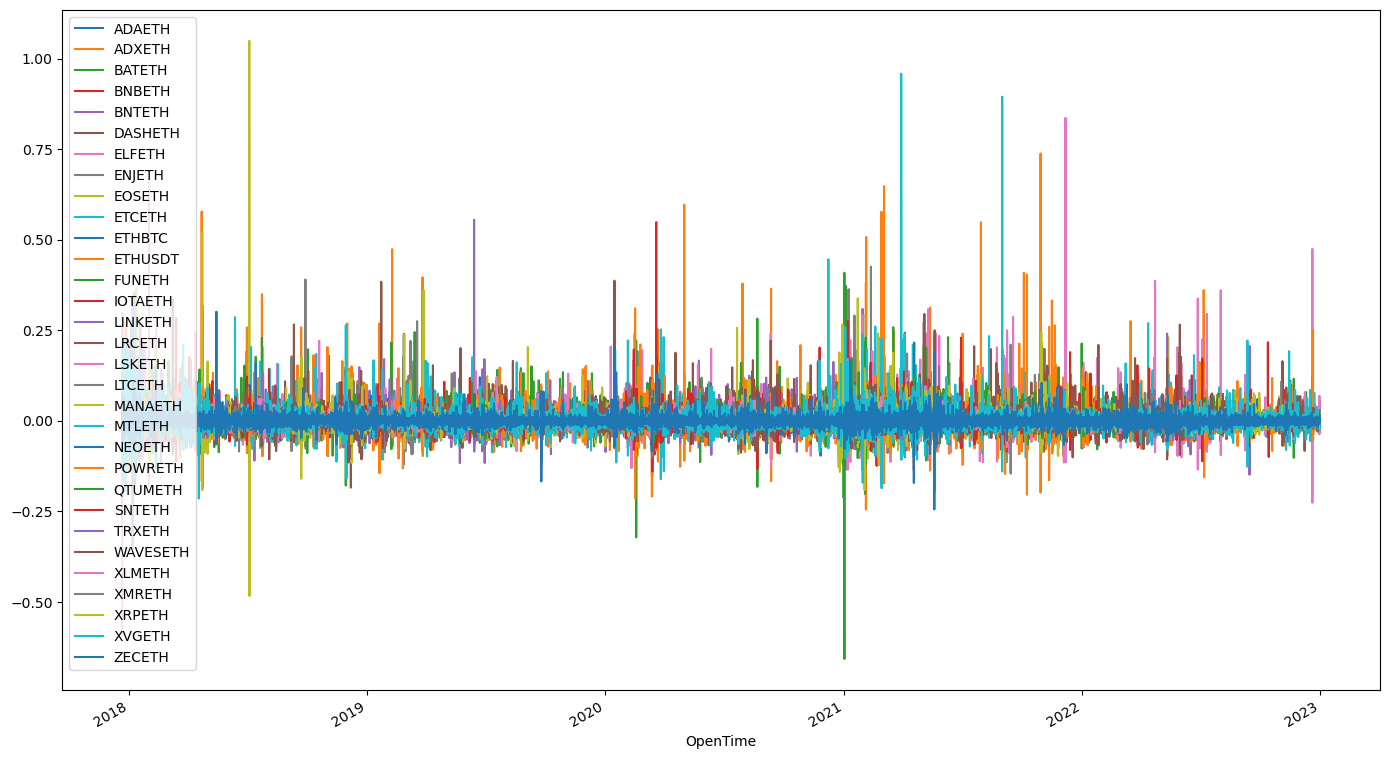

,ADAETH,ADXETH,BATETH,BNBETH,BNTETH,DASHETH,ELFETH,ENJETH,EOSETH,ETCETH,ETHBTC,ETHUSDT,FUNETH,IOTAETH,LINKETH,LRCETH,LSKETH,LTCETH,MANAETH,MTLETH,NEOETH,POWRETH,QTUMETH,SNTETH,TRXETH,WAVESETH,XLMETH,XMRETH,XRPETH,XVGETH,ZECETH
ADAETH,1.000000,0.132891,0.233360,0.251958,0.119270,0.250642,0.168061,0.177766,0.303688,0.236444,-0.232592,-0.066355,0.137667,0.298986,0.211903,0.170705,0.176320,0.281051,0.173393,0.167534,0.334155,0.184240,0.291285,0.282930,0.288212,0.199208,0.448061,0.257279,0.323016,0.183081,0.245846
ADXETH,0.132891,1.000000,0.158589,0.146705,0.087806,0.118652,0.129037,0.124207,0.111468,0.100679,-0.176154,-0.091682,0.106525,0.135519,0.101774,0.094493,0.142828,0.113339,0.133012,0.145774,0.135956,0.144863,0.121520,0.126790,0.128635,0.118378,0.134637,0.142919,0.109051,0.114466,0.117511
BATETH,0.233360,0.158589,1.000000,0.206548,0.135315,0.217507,0.149293,0.212807,0.193049,0.177222,-0.173230,-0.084858,0.119295,0.241723,0.196519,0.186682,0.175534,0.187936,0.232947,0.164775,0.257797,0.169432,0.221221,0.167116,0.186559,0.189136,0.243717,0.217139,0.178114,0.159564,0.220076
BNBETH,0.251958,0.146705,0.206548,1.000000,0.111673,0.241753,0.144424,0.162354,0.210212,0.200877,-0.357192,-0.240079,0.146201,0.243639,0.178018,0.148484,0.186304,0.243954,0.146920,0.143919,0.239981,0.155543,0.213746,0.162029,0.215448,0.197829,0.232561,0.262836,0.211876,0.149643,0.204221
BNTETH,0.119270,0.087806,0.135315,0.111673,1.000000,0.102125,0.087016,0.117378,0.106253,0.083264,-0.120992,-0.089762,0.092351,0.124638,0.123343,0.101321,0.108971,0.098390,0.101726,0.091033,0.132416,0.095946,0.111053,0.099329,0.101697,0.105152,0.113223,0.122772,0.092710,0.087599,0.101347
DASHETH,0.250642,0.118652,0.217507,0.241753,0.102125,1.000000,0.140371,0.166791,0.283614,0.299225,-0.299475,-0.168169,0.113712,0.281313,0.186010,0.147283,0.200276,0.335475,0.167844,0.148547,0.300522,0.145548,0.278007,0.170026,0.214724,0.205992,0.256122,0.370540,0.238468,0.162176,0.438877
ELFETH,0.168061,0.129037,0.149293,0.144424,0.087016,0.140371,1.000000,0.135085,0.148437,0.112944,-0.150911,-0.081753,0.111204,0.169604,0.118359,0.131924,0.146325,0.133000,0.120835,0.144525,0.178298,0.230154,0.151801,0.155133,0.149999,0.136078,0.147424,0.150080,0.097654,0.124442,0.126051
ENJETH,0.177766,0.124207,0.212807,0.162354,0.117378,0.166791,0.135085,1.000000,0.152547,0.150821,-0.124262,-0.033899,0.103378,0.208943,0.156977,0.160176,0.156796,0.140574,0.245888,0.150575,0.202152,0.157100,0.173488,0.143357,0.156857,0.157206,0.187189,0.172990,0.129064,0.151199,0.167070
EOSETH,0.303688,0.111468,0.193049,0.210212,0.106253,0.283614,0.148437,0.152547,1.000000,0.331951,-0.241742,-0.087842,0.112962,0.261772,0.168101,0.145751,0.185292,0.361587,0.147558,0.145082,0.351281,0.140549,0.342173,0.186877,0.286115,0.174842,0.305262,0.245275,0.304048,0.154151,0.264000
ETCETH,0.236444,0.100679,0.177222,0.200877,0.083264,0.299225,0.112944,0.150821,0.331951,1.000000,-0.187782,-0.067252,0.085896,0.241944,0.171573,0.132017,0.169806,0.294931,0.150626,0.123262,0.312346,0.110572,0.300893,0.145807,0.201218,0.165698,0.256603,0.243208,0.235354,0.142049,0.270971


In [31]:
df_returns = (df - df.shift(1))/df.shift(1)
df_returns = df_returns[1:]
df_returns.plot(figsize=(17, 10))
plt.show()

corr = df_returns.corr()
corr.style.background_gradient(cmap='coolwarm')

[0.39611046 0.06300755 0.04394796 0.03479176 0.03112325 0.0272361
 0.02618478 0.02533726 0.0239957  0.02345452]


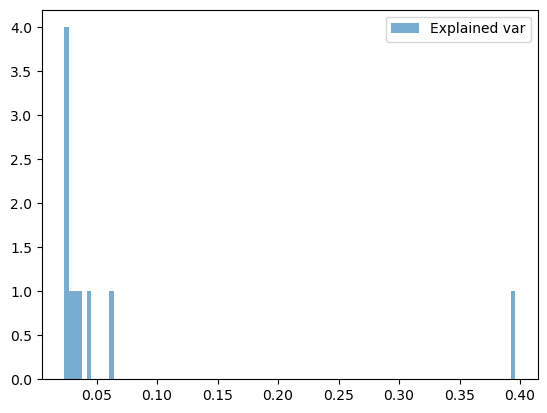

[0.39611046 0.45911801 0.50306597 0.53785774 0.56898099 0.59621709
 0.62240187 0.64773912 0.67173482 0.69518933]
[3.60393541 1.43735867 1.20043383 1.06808805 1.01020924 0.94502059
 0.92660218 0.91148314 0.88702433 0.87696462]


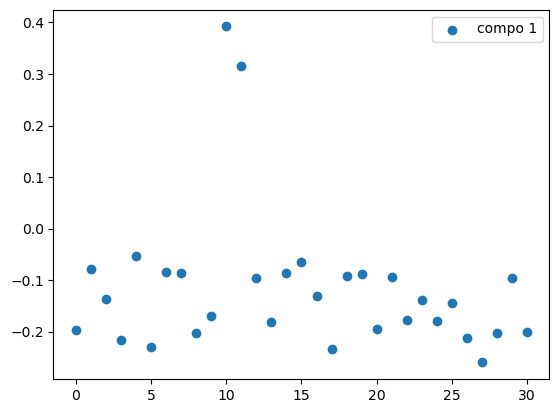

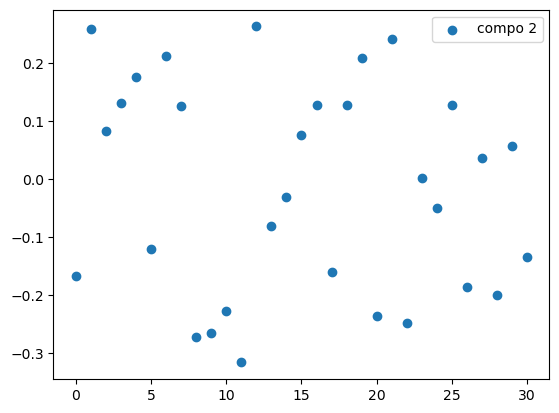

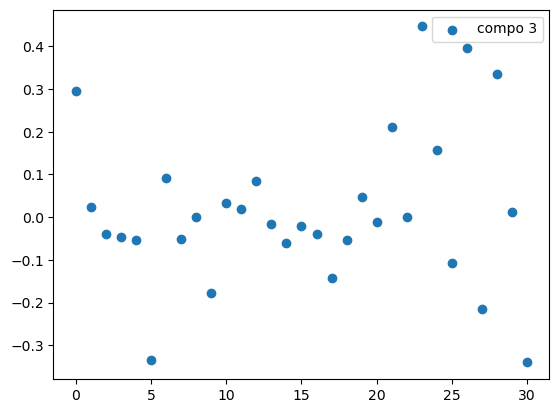

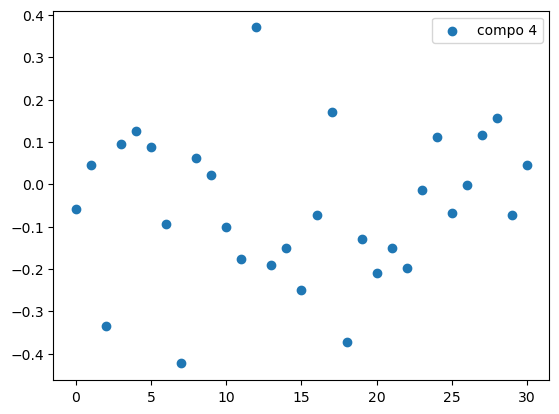

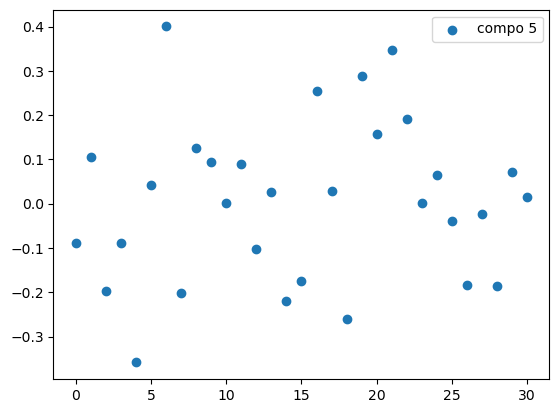

In [49]:

pca = PCA(n_components=10)
pca.fit(corr)
print(pca.explained_variance_ratio_)

plt.hist( pca.explained_variance_ratio_, label ='Explained var', alpha=0.6, bins=100)
plt.legend()
plt.show()

print(np.cumsum(pca.explained_variance_ratio_))
print(pca.singular_values_)

plt.scatter(range(0, 31), pca.components_[0], label ='compo 1')
plt.legend()
plt.show()
plt.scatter(range(0, 31), pca.components_[1], label ='compo 2')
plt.legend()
plt.show()
plt.scatter(range(0, 31), pca.components_[2], label ='compo 3')
plt.legend()
plt.show()
plt.scatter(range(0, 31), pca.components_[3], label ='compo 4')
plt.legend()
plt.show()
plt.scatter(range(0, 31), pca.components_[4], label ='compo 5')
plt.legend()
plt.show()

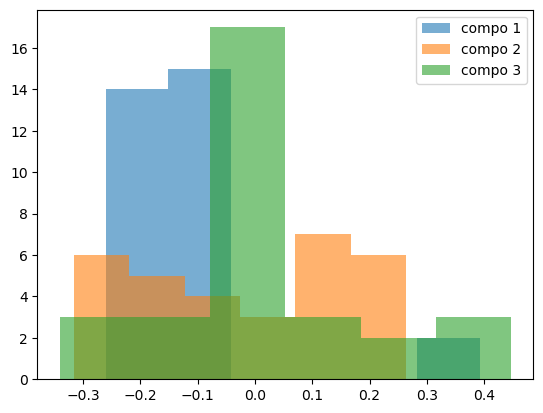

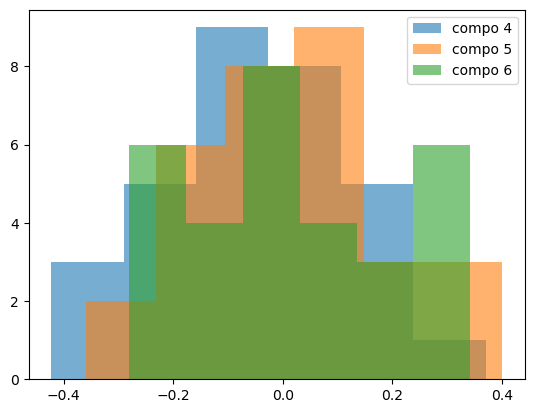

In [45]:
plt.hist( pca.components_[0], label ='compo 1', alpha=0.6, bins='sqrt')
plt.hist( pca.components_[1], label ='compo 2', alpha=0.6, bins='sqrt')
plt.hist( pca.components_[2], label ='compo 3', alpha=0.6, bins='sqrt')
plt.legend()
plt.show()
plt.hist( pca.components_[3], label ='compo 4', alpha=0.6, bins='sqrt')
plt.hist( pca.components_[4], label ='compo 5', alpha=0.6, bins='sqrt')
plt.hist( pca.components_[5], label ='compo 6', alpha=0.6, bins='sqrt')
plt.legend()
plt.show()

In [52]:
pos = pca.components_[1] > 0
neg = pca.components_[1] < 0

print('Pos comp : ', corr.columns[pos])
print('Neg comp : ', corr.columns[neg])

Pos comp :  Index(['ADXETH', 'BATETH', 'BNBETH', 'BNTETH', 'ELFETH', 'ENJETH', 'FUNETH',
       'LRCETH', 'LSKETH', 'MANAETH', 'MTLETH', 'POWRETH', 'SNTETH',
       'WAVESETH', 'XMRETH', 'XVGETH'],
      dtype='object')
Neg comp :  Index(['ADAETH', 'DASHETH', 'EOSETH', 'ETCETH', 'ETHBTC', 'ETHUSDT', 'IOTAETH',
       'LINKETH', 'LTCETH', 'NEOETH', 'QTUMETH', 'TRXETH', 'XLMETH', 'XRPETH',
       'ZECETH'],
      dtype='object')


In [53]:
train

,ADAETH,ADXETH,BATETH,BNBETH,BNTETH,DASHETH,ELFETH,ENJETH,EOSETH,ETCETH,...,POWRETH,QTUMETH,SNTETH,TRXETH,WAVESETH,XLMETH,XMRETH,XRPETH,XVGETH,ZECETH
OpenTime,,,,,,,,,,,,,,,,,,,,,
2017-12-21 03:00:00,0.000626,0.002198,0.000473,0.006692,0.005600,1.90431,0.003000,0.000139,0.013998,0.049187,...,0.001573,0.070570,0.000236,0.000064,0.020343,0.000333,0.58778,0.001135,0.000195,0.83159
2017-12-21 04:00:00,0.000644,0.002292,0.000460,0.006693,0.005764,1.83499,0.001220,0.000147,0.014073,0.048771,...,0.001537,0.070534,0.000239,0.000070,0.019710,0.000344,0.57654,0.001170,0.000198,0.82102
2017-12-21 05:00:00,0.000611,0.002110,0.000444,0.006498,0.005679,1.76980,0.001050,0.000146,0.013598,0.047805,...,0.001474,0.068215,0.000230,0.000078,0.018861,0.000325,0.55213,0.001118,0.000177,0.80594
2017-12-21 06:00:00,0.000592,0.002124,0.000447,0.006390,0.005800,1.74000,0.001154,0.000145,0.013912,0.048053,...,0.001489,0.067700,0.000227,0.000076,0.018819,0.000323,0.54972,0.001133,0.000180,0.82101
2017-12-21 07:00:00,0.000589,0.002285,0.000455,0.006600,0.005805,1.76672,0.001498,0.000140,0.014018,0.050752,...,0.001453,0.069311,0.000222,0.000073,0.019001,0.000322,0.55937,0.001092,0.000179,0.82815
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31 19:00:00,0.000206,0.000093,0.000139,0.205600,0.000293,0.03536,0.000130,0.000202,0.000722,0.013140,...,0.000100,0.001533,0.000016,0.000045,0.001090,0.000059,0.12285,0.000285,0.000002,0.03156
2022-12-31 20:00:00,0.000207,0.000093,0.000140,0.205300,0.000284,0.03527,0.000132,0.000202,0.000722,0.013130,...,0.000100,0.001533,0.000015,0.000045,0.001090,0.000059,0.12301,0.000285,0.000002,0.03156
2022-12-31 21:00:00,0.000207,0.000093,0.000140,0.205400,0.000284,0.03518,0.000132,0.000201,0.000723,0.013180,...,0.000100,0.001533,0.000015,0.000045,0.001086,0.000059,0.12299,0.000285,0.000002,0.03147


ADXETH
BATETH
BNBETH
BNTETH
ELFETH
ENJETH
FUNETH
LRCETH
LSKETH
MANAETH
MTLETH
POWRETH
SNTETH
WAVESETH
XMRETH
XVGETH


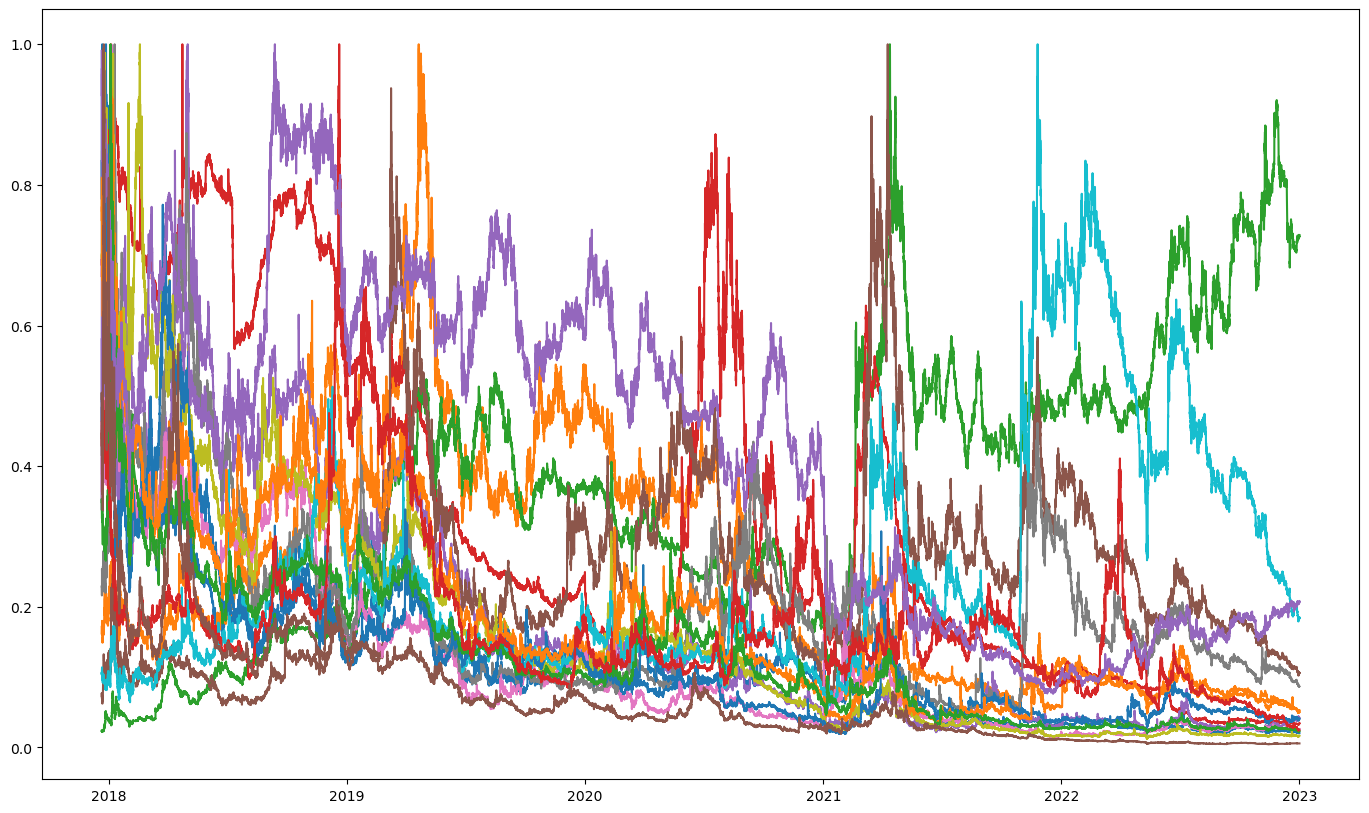

In [61]:
plt.figure(figsize=(17, 10))
for k in corr.columns[pos]: 
    print(k)
    symbol = (train[k]/np.max(train[k]))
    plt.plot(symbol)
plt.show()

ADAETH
DASHETH
EOSETH
ETCETH
ETHBTC
ETHUSDT
IOTAETH
LINKETH
LTCETH
NEOETH
QTUMETH
TRXETH
XLMETH
XRPETH
ZECETH


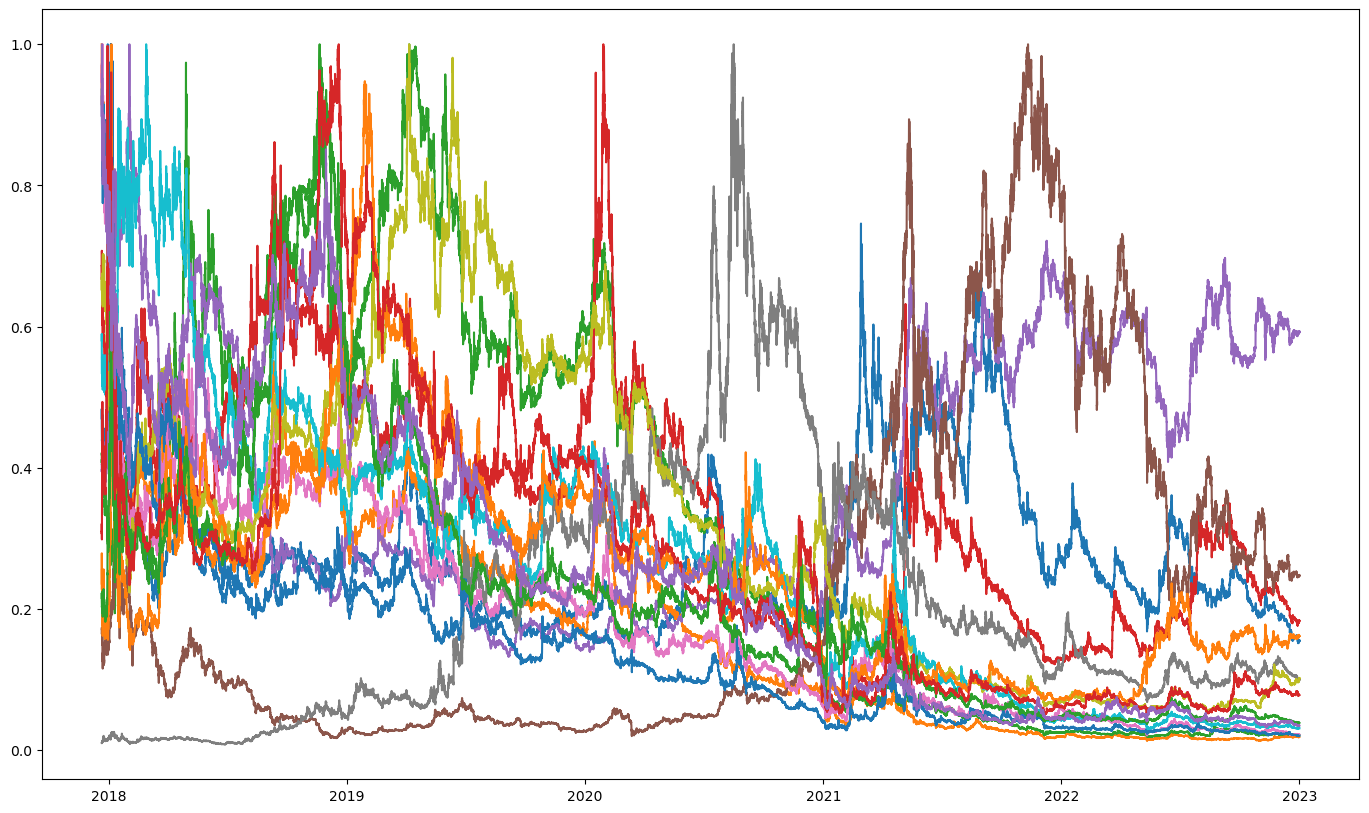

In [60]:
plt.figure(figsize=(17, 10))
for k in corr.columns[neg]: 
    print(k)
    symbol = (train[k]/np.max(train[k]))
    plt.plot(symbol)
plt.show()